# **Voice Gender Recognition Using Convolutional Neural Network**



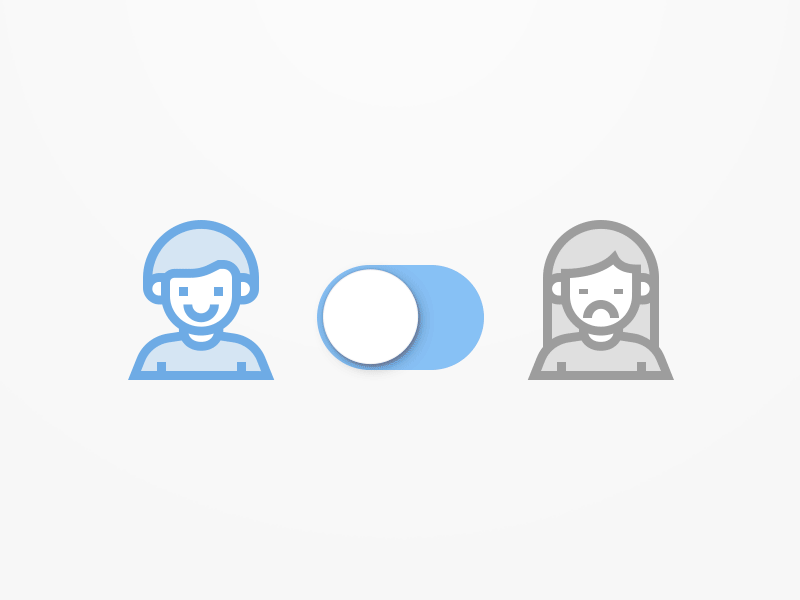

# **About the Project**

- Our project aims to detect from the voice if the speaker is male or female, making this possible by using CNN deep learning model. 

- Our dataset from Kaggle , which consists of 3,168 recorded voice samples collected from male and female speakers.[DataSet](https://www.kaggle.com/datasets/primaryobjects/voicegender)



# Loading Packages

In [1]:
!pip3 install h5py
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Import Essential Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import rcParams
import warnings
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import gradio as gr
%matplotlib inline

# **Getting Started with Data Preprocessing** 

### Reading DataSet

In [3]:
df = pd.read_csv('/content/voice.csv')

### Data Description

In [4]:
# display first five columns
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
# shape of dataset 
df.shape

(3168, 21)

In [6]:
# number of columns 
len(df.columns)

21

In [7]:
# view the column names of the dataframe
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [8]:
# types of columns in dataset
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [9]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

### Processing Categorical Values

In [10]:
# check distribution of target_class column
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [11]:
# Encoding labels from string to boolean value
df['label'].replace('male',1,inplace=True)
df['label'].replace('female',0,inplace=True)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


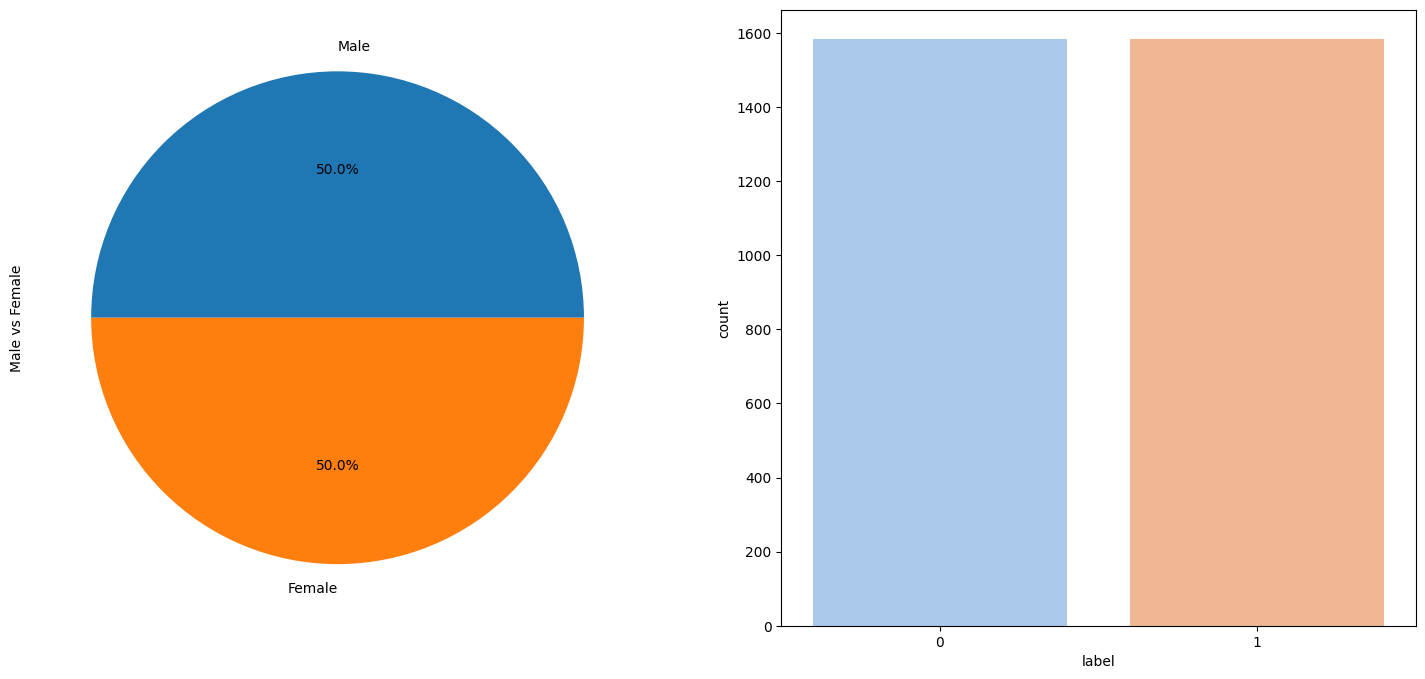

In [12]:
# data is balanced 
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
df.label.value_counts().plot(kind="pie",
                                           fontsize=10,
                                           labels=["Male", "Female"],
                                           ylabel="Male vs Female",
                                           autopct='%1.1f%%');

plt.subplot(1, 2, 2)
sns.countplot(x="label",data=df, palette="pastel")
plt.show()

# Data Cleaning 



*   Checking nulls values 
*   Handling duplicates 



In [13]:
df.isna().sum()     # No Nulls Values appear in dataset 

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [14]:
df.duplicated().sum()

2

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

### Outliers Function 

In [17]:
# checking number of outliers in each feature "continous feature"

x = ['meanfreq','sd','median','Q25','Q75','IQR','skew','kurt','sp.ent','sfm','mode','centroid','meanfun','minfun','maxfun','meandom','mindom','dfrange','modindx','label']  
def outliers(data_out, drop = False):
  for each_x in data_out.columns:
      x_data = data_out[each_x]

      '''  25th percentile of the data of the given feature
      75th percentile of the data of the given feature
      Interquartile Range '''

      Q1 = np.percentile(x_data, 25.)                                           
      Q3 = np.percentile(x_data, 75.)                                  
      IQR = Q3-Q1                                                            
      outlier_step = IQR * 1.5
      outliers = x_data[~((x_data >= Q1 - outlier_step) & (x_data <= Q3 + outlier_step))].index.tolist()
      if not drop:
          print('For the feature {}, Number of Outliers is {}'.format(each_x, len(outliers)))
      if drop:
          df.drop(outliers, inplace = True, errors = 'ignore')
          print('Outliers from {} feature removed'.format(each_x))
outliers(df[x],drop=True)

Outliers from meanfreq feature removed
Outliers from sd feature removed
Outliers from median feature removed
Outliers from Q25 feature removed
Outliers from Q75 feature removed
Outliers from IQR feature removed
Outliers from skew feature removed
Outliers from kurt feature removed
Outliers from sp.ent feature removed
Outliers from sfm feature removed
Outliers from mode feature removed
Outliers from centroid feature removed
Outliers from meanfun feature removed
Outliers from minfun feature removed
Outliers from maxfun feature removed
Outliers from meandom feature removed
Outliers from mindom feature removed
Outliers from dfrange feature removed
Outliers from modindx feature removed
Outliers from label feature removed


# Visualizations

## bar plot


*   distribution of a binary categorical variable ("label")




1    1080
0    1066
Name: label, dtype: int64


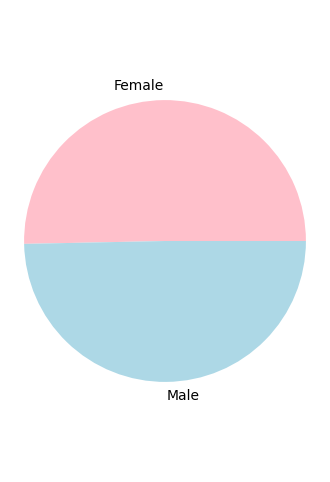

In [18]:
colors = ['pink', 'Lightblue']
plt.figure(figsize = [4, 6]) 
df_p = df[df.columns[-1]]
plt.pie(df_p.value_counts(),colors=colors , labels = ['Female' , 'Male'])
plt.axis('equal')
print(df['label'].value_counts())

###Kernel Density Estimate Plot




*   represent the distribution of a continuous variable






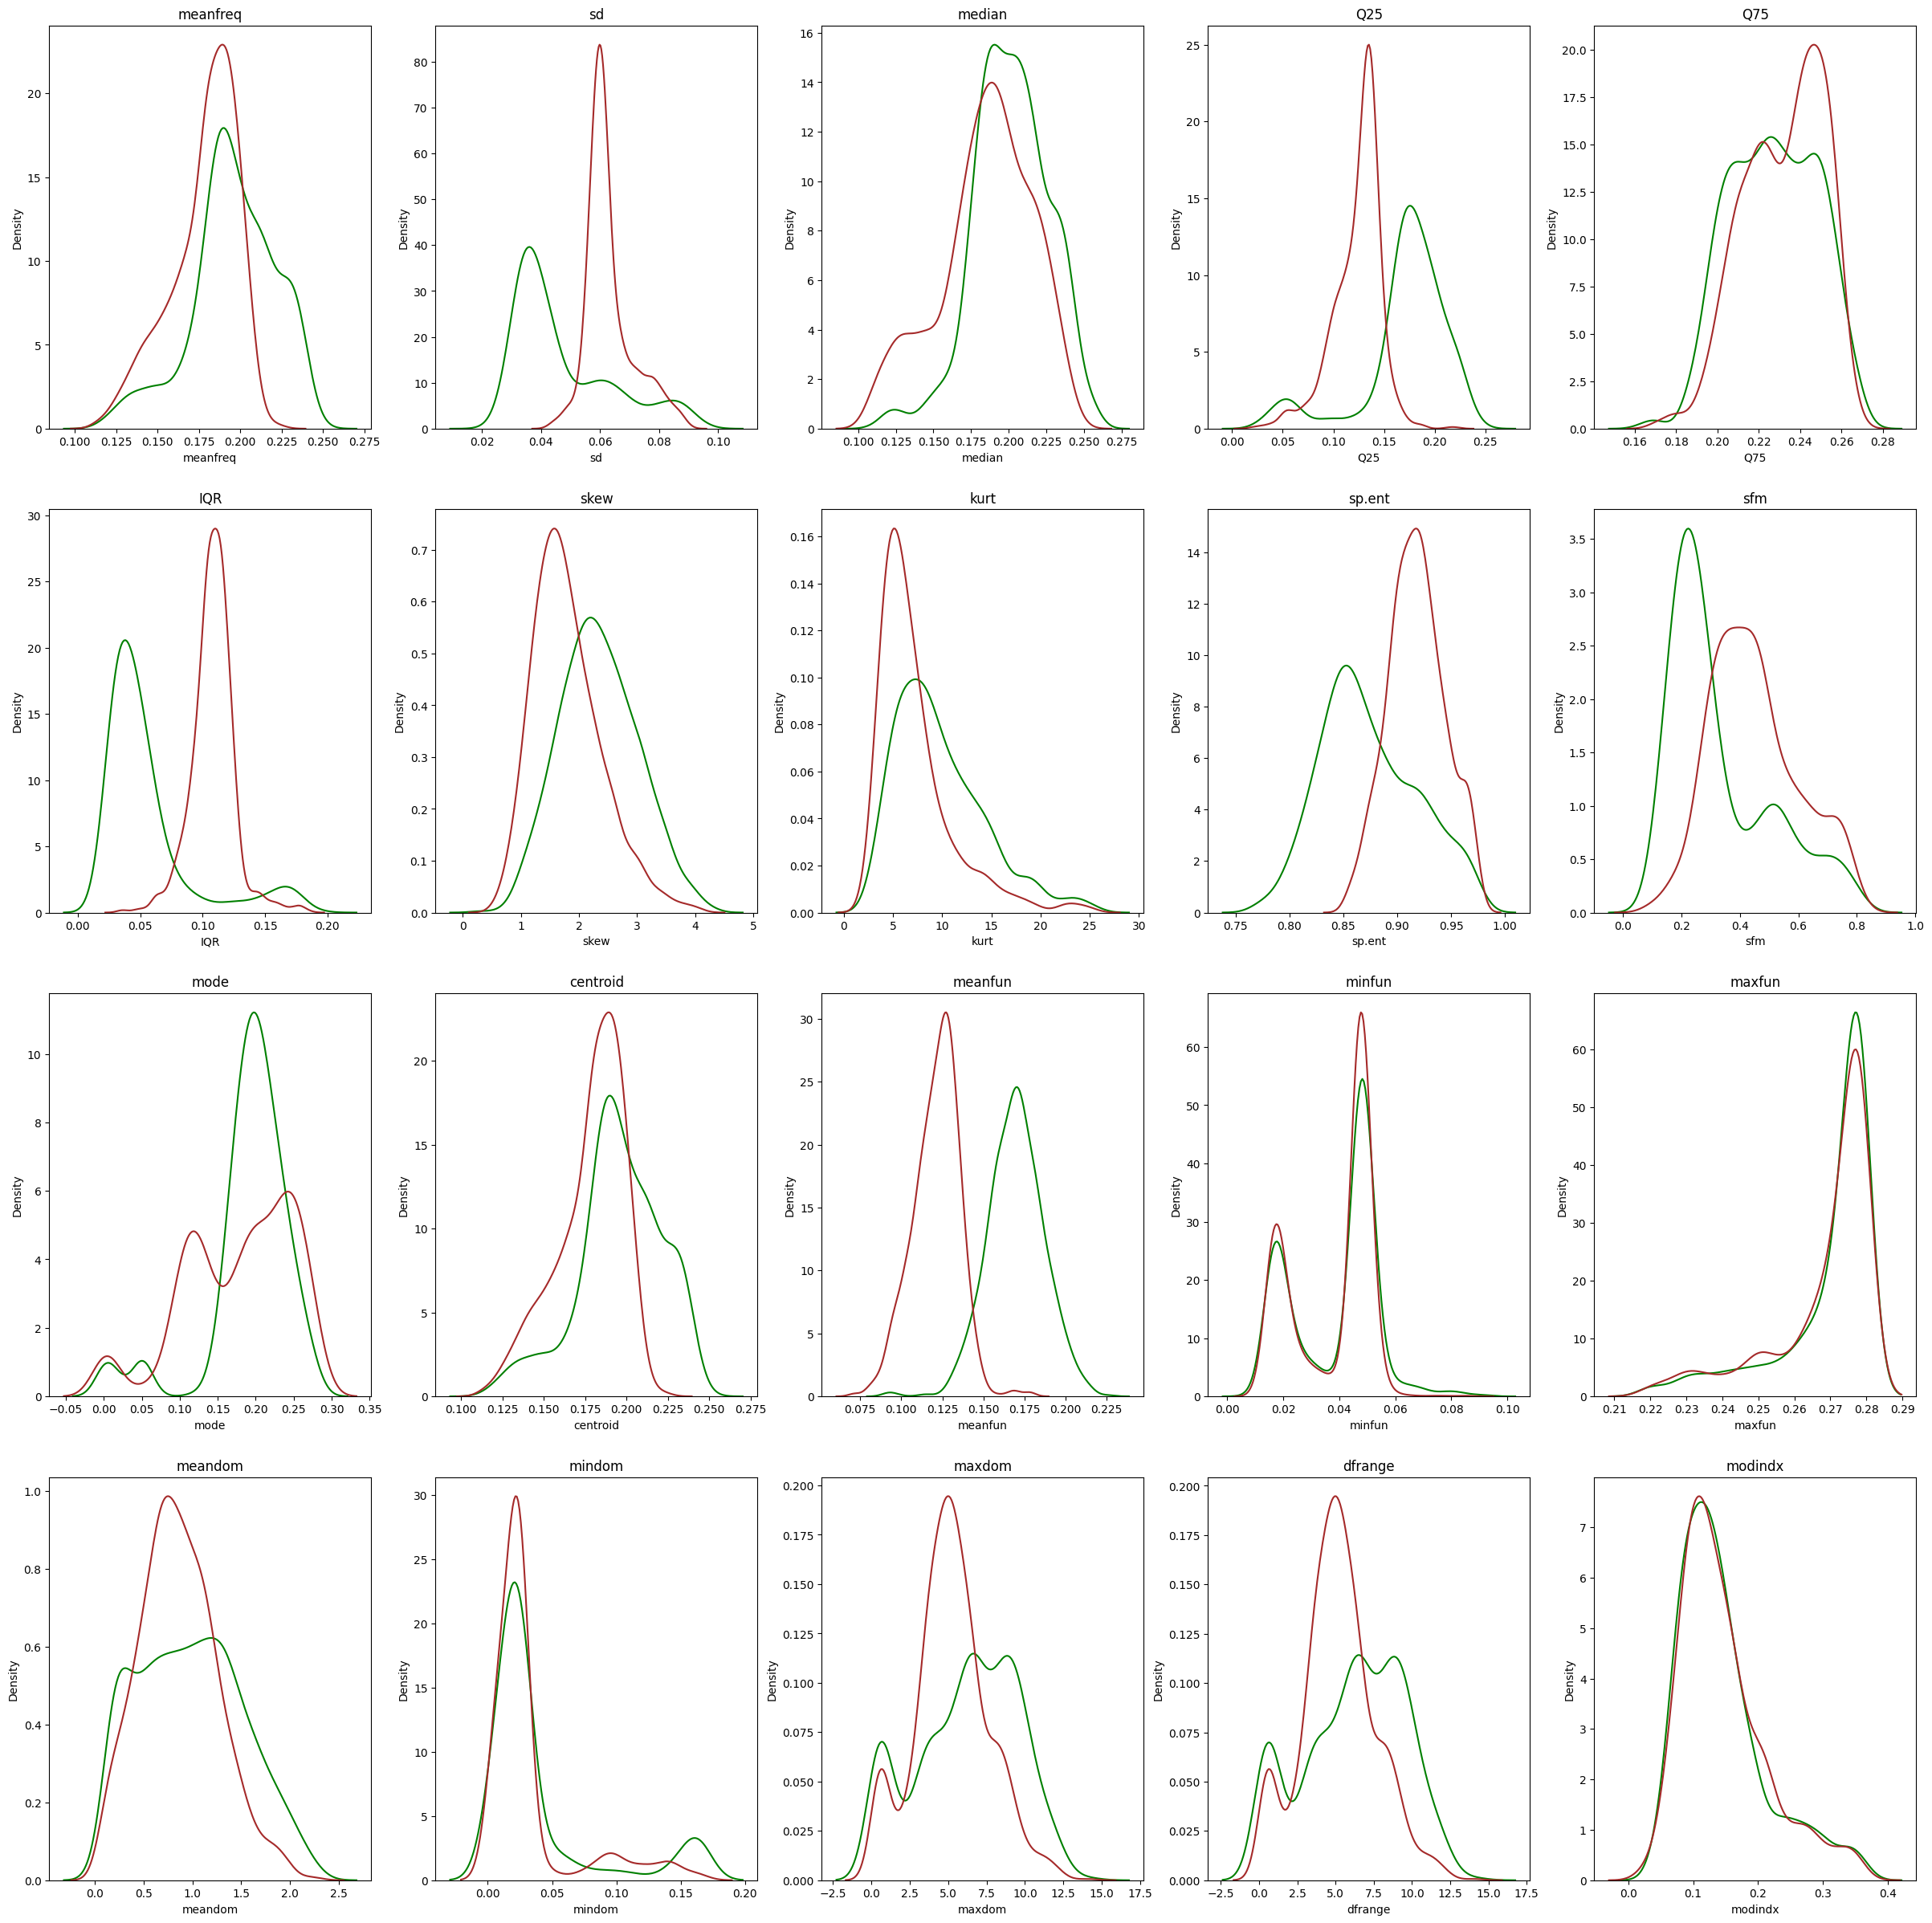

In [19]:
plt.subplots(4,5,figsize=(30,30))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(df.columns[i-1])
    sns.kdeplot(df.loc[df['label'] == 0, df.columns[i-1]], color= 'green', label='female')
    sns.kdeplot(df.loc[df['label'] == 1, df.columns[i-1]], color= 'brown', label='male')

## Distance Plot


*  represent the distribution of pairwise distances




<ipython-input-20-c2f3c3aeb738>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i][df['label']==0], color='r', label = 'Female')
<ipython-input-20-c2f3c3aeb738>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i][df['label']==1], color='b', label = 'Male')
<ipython-input-20-c2f3c3aeb738>:

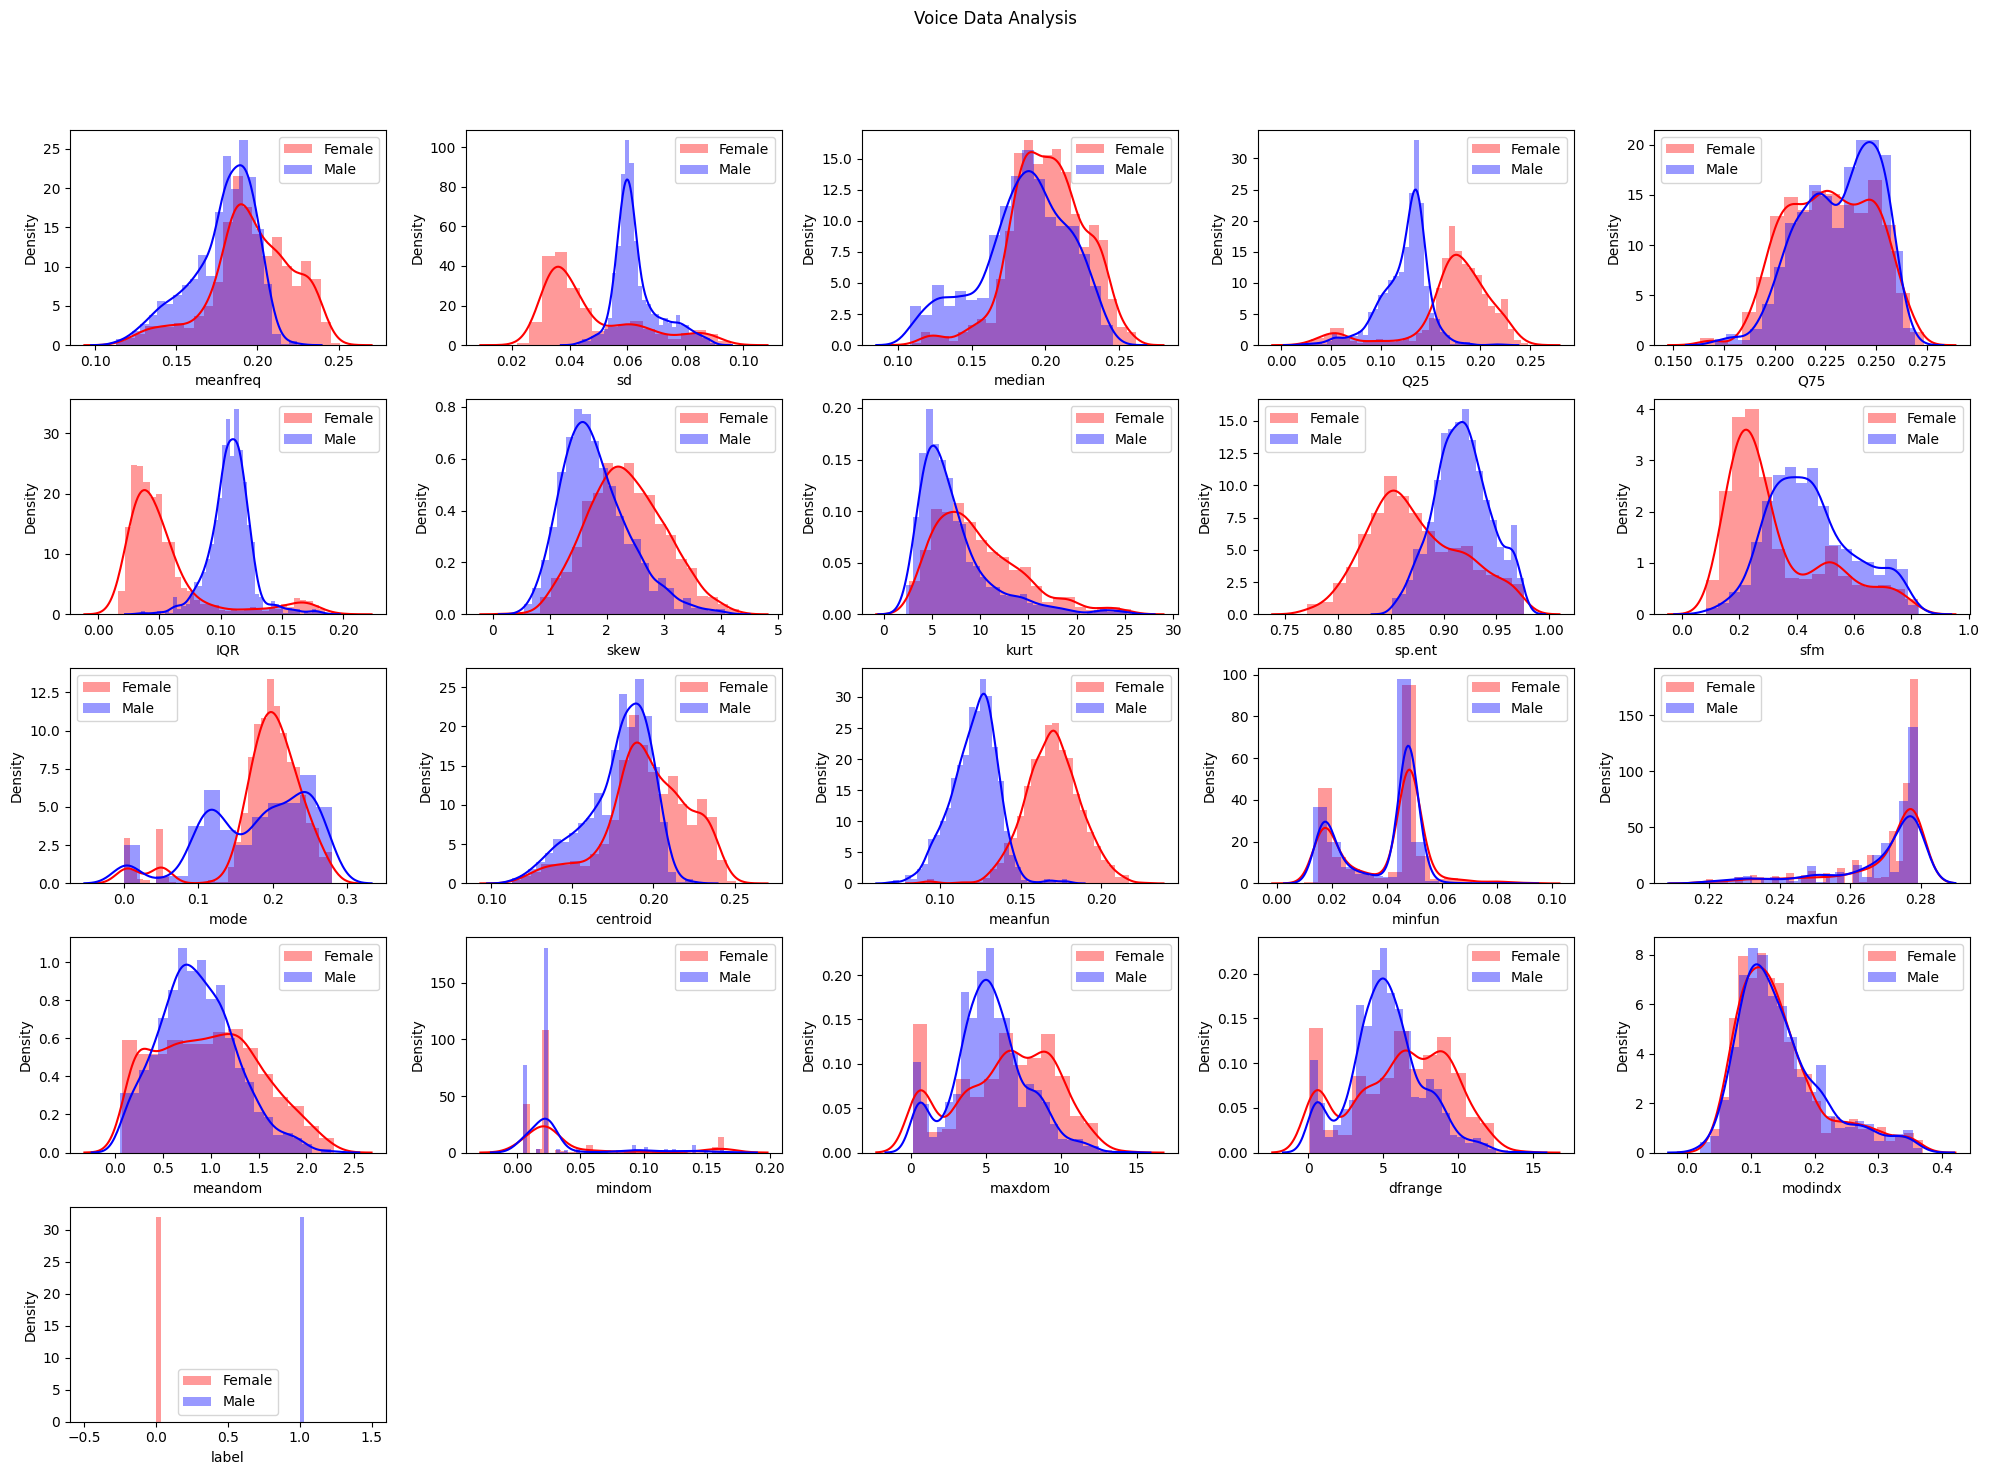

In [20]:
fig = plt.figure(figsize = (20, 15))
j = 0
for i in df.columns:
    plt.subplot(5, 5, j+1)
    j += 1
    sns.distplot(df[i][df['label']==0], color='r', label = 'Female')
    sns.distplot(df[i][df['label']==1], color='b', label = 'Male')
    plt.legend(loc='best')
fig.suptitle('Voice Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()


## Correlation Matrix and Heat Map


*   explore the relationship between pairs of variables




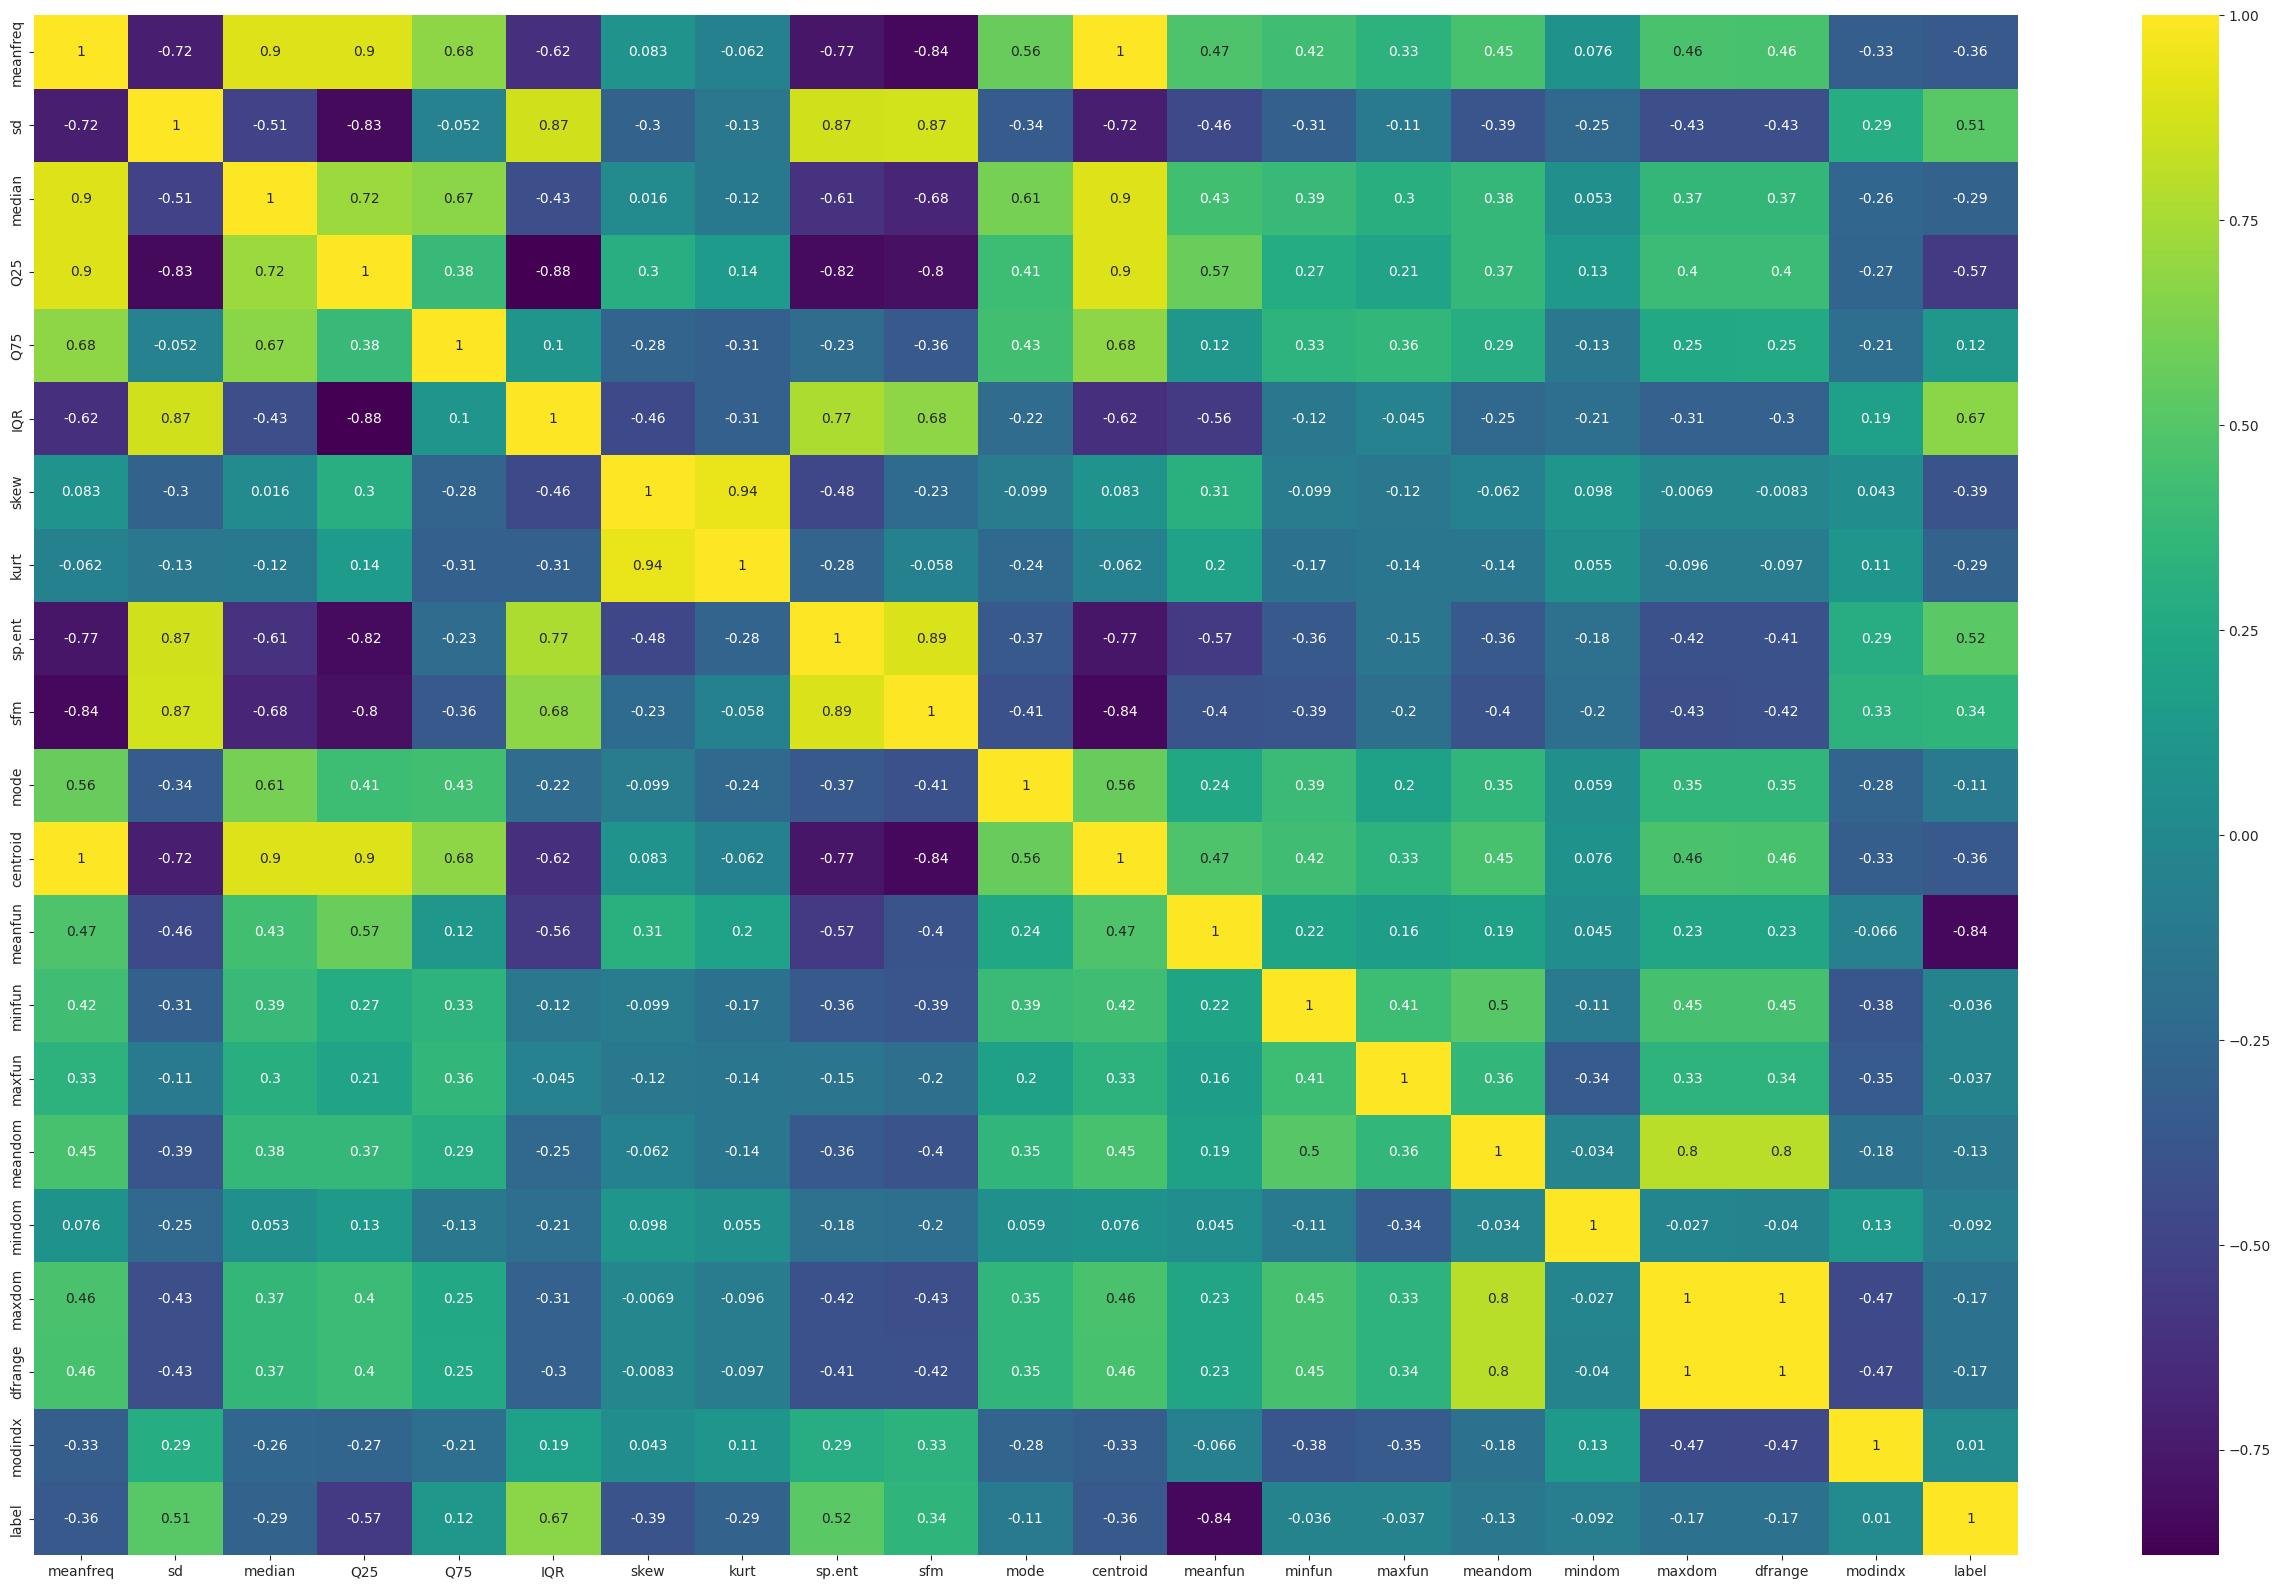

In [21]:
'''calculating correlation data between features
setting figure size
setting plot style
plotting heatmap using sns library '''

corr_data = df.corr()                             
plt.figure(figsize=(32, 20))                           
sns.set_style('ticks')                                  
sns.heatmap(corr_data, cmap='viridis',annot=True)      
plt.show()

# Prepare Data For Using CNN 

In [22]:
# creates a new variable y that contains the target variable 
y = df['label'].copy()
# creates a new variable X that contains the features.
X = df.drop('label', axis=1).copy()

In [23]:
# scaling & standardizatin
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
# ensuring all sequences have the same length
X = tf.keras.preprocessing.sequence.pad_sequences(X, dtype=np.float, maxlen=25, padding='post')
X = X.reshape(-1, 5, 5)
X = np.expand_dims(X, axis=3)

<ipython-input-24-d060ccadbb48>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = tf.keras.preprocessing.sequence.pad_sequences(X, dtype=np.float, maxlen=25, padding='post')


# Splitting & Modeling 

In [25]:
# Splitting df into 70% and 30% to construct Training and Testing Data respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42) 

In [26]:
# shape of train and test 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1502, 5, 5, 1) (1502,)
(644, 5, 5, 1) (644,)


# Convolutional Neural Network

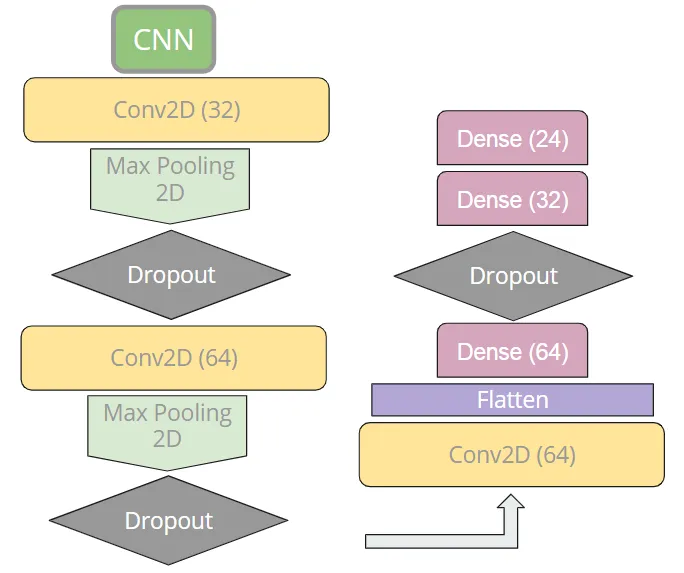

In [27]:
# Create CNN Model
# creates a new input layer for the neural network using the " tf.keras.Input() " 
inputs = tf.keras.Input(shape=(X.shape[1], X.shape[2], X.shape[3]))

# creates a first convolutional layer and downsamples the output 
x = tf.keras.layers.Conv2D(16, 2, activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D()(x)

# creates a second convolutional layer and downsamples the output 
x = tf.keras.layers.Conv2D(32, 1, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

# reshapes the output of the previous layers into a 1D vector
x = tf.keras.layers.Flatten()(x)

# fully connected layer
x = tf.keras.layers.Dense(64, activation='relu')(x)

# adds the output layer ... " binary prediction "
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 5, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 16)          80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 32)          544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0     

In [29]:
# Compiling the model 
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc') 
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
38/38 [==============================] - 2s 15ms/step - loss: 0.6718 - accuracy: 0.6078 - auc: 0.7080 - val_loss: 0.6342 - val_accuracy: 0.7342 - val_auc: 0.8170
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.5960 - accuracy: 0.7577 - auc: 0.8382 - val_loss: 0.5348 - val_accuracy: 0.7874 - val_auc: 0.8669
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.4999 - accuracy: 0.7877 - auc: 0.8813 - val_loss: 0.4652 - val_accuracy: 0.8007 - val_auc: 0.8942
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 0.4238 - accuracy: 0.8177 - auc: 0.9062 - val_loss: 0.3825 - val_accuracy: 0.8439 - val_auc: 0.9213
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 0.3508 - accuracy: 0.8560 - auc: 0.9375 - val_loss: 0.3272 - val_accuracy: 0.8704 - val_auc: 0.9406
Epoch 6/100
38/38 [==============================] - 0s 6ms/step - loss: 0.3067 - accuracy: 0.8751 - auc: 0.9514 - val_loss: 0.3359 - 

# Model Evaluation 

In [30]:
model.evaluate(X_test, y_test,verbose = 1)

21/21 [==============================] - 0s 2ms/step - loss: 0.1455 - accuracy: 0.9472 - auc: 0.9862


[0.14554789662361145, 0.9472049474716187, 0.9861577749252319]

##### Evaluation of train dataset 

In [31]:
train_loss = model.evaluate(X_train, y_train)

47/47 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.9574 - auc: 0.9918


##### Evaluation of Test dataset

In [32]:
test_loss = model.evaluate(X_test, y_test)

21/21 [==============================] - 0s 2ms/step - loss: 0.1455 - accuracy: 0.9472 - auc: 0.9862


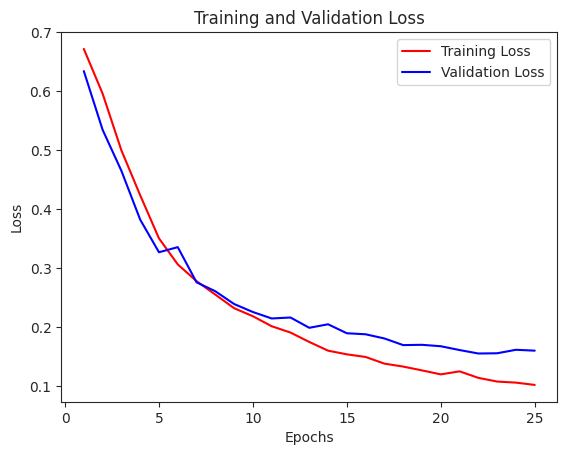

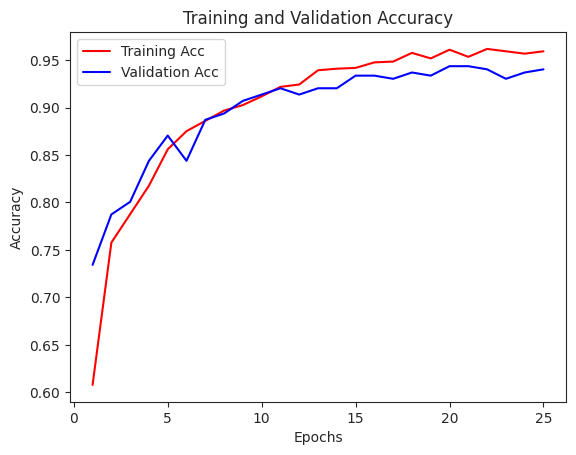

In [33]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Create a range of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(epochs, train_acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

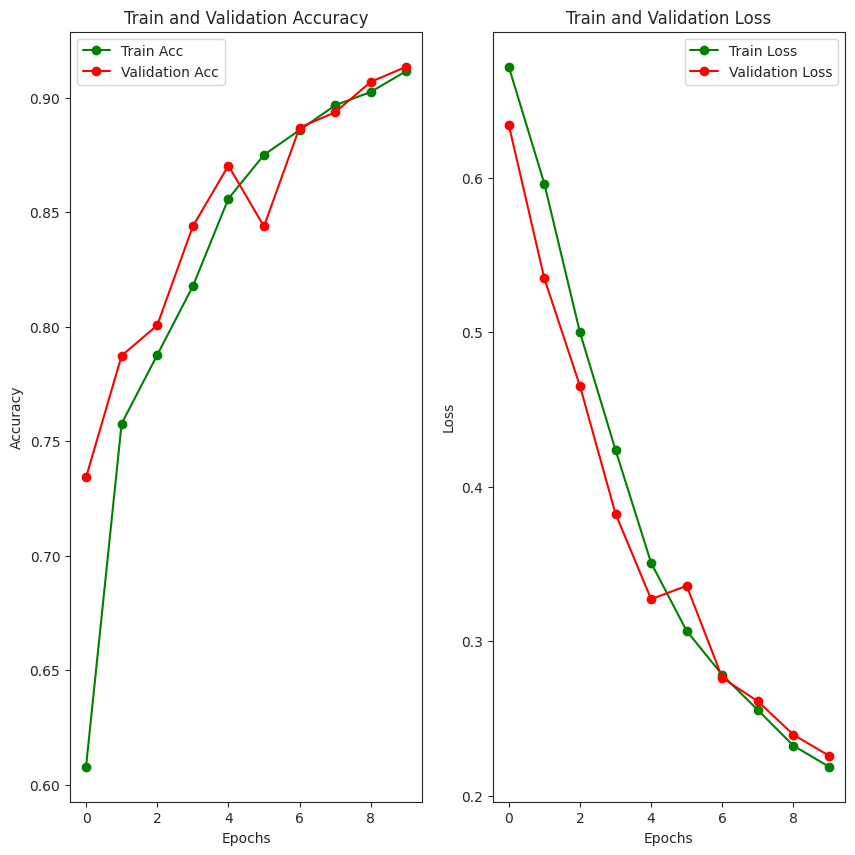

In [34]:
epochs = [i for i in range(10)]

fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
vall_acc = history.history['val_accuracy']
vall_loss = history.history['val_loss']

# Make sure the arrays have the same length as epochs
train_acc = train_acc[:len(epochs)]
vall_acc = vall_acc[:len(epochs)]
train_loss = train_loss[:len(epochs)]
vall_loss = vall_loss[:len(epochs)]

fig.set_size_inches(10, 10)

ax[0].plot(epochs, train_acc, 'go-', label='Train Acc')
ax[0].plot(epochs, vall_acc, 'ro-', label='Validation Acc')
ax[0].set_title('Train and Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss, 'go-', label='Train Loss')
ax[1].plot(epochs, vall_loss, 'ro-', label='Validation Loss')
ax[1].set_title('Train and Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.show()

## For the deployment part 

In [35]:
# Saving the weights of model 
model.save_weights('my_model_weights.h5')

## Test our project using librosa

In [36]:
from scipy.io.wavfile import read
import librosa
import scipy
from pydub import AudioSegment
from scipy.stats import skew, kurtosis
import numpy as np
import librosa

In [37]:
# load weights of model 
model.load_weights('my_model_weights.h5')

In [39]:
audio_file = AudioSegment.from_file("/content/ar-06.wav", format="wav")
raw_data = audio_file.raw_data

In [40]:
audio_file

In [41]:
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 61.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [42]:
def Extract_features_from_wav(wav_file_path):
  wav_file_tuple = librosa.load(wav_file_path)
  signal, sample_rate = wav_file_tuple
  # Extract the features
  meanfreq = librosa.feature.spectral_centroid(y=signal,sr=sample_rate)[0].mean()
  sd = librosa.feature.spectral_contrast(y=signal, sr=sample_rate).std()
  median = np.median(signal)
  Q25 = np.percentile(signal, 25)
  Q75 = np.percentile(signal, 75)
  IQR = Q75 - Q25
  skewness = skew(signal)
  kurt = kurtosis(signal)
  sp_ent = -np.sum(signal**2 * np.log(signal**2 + 1e-12)) 
  sfm = librosa.feature.spectral_flatness(y=signal).mean()
  mode = np.argmax(np.bincount(signal.astype(int)))
  centroid = np.abs(librosa.stft(signal)).mean()
  meanfun = np.mean(librosa.feature.rms(y=signal)) 
  minfun = np.min(signal)
  maxfun = np.max(signal)
  meandom = np.mean(signal)

  zero_crossings = librosa.zero_crossings(signal)
  mindom = np.min(np.diff(np.where(zero_crossings)[0]))
  maxdom = np.max(np.diff(np.where(zero_crossings)[0]))

  dfrange = maxdom - mindom
  modindx = librosa.feature.spectral_contrast(y=signal, sr=sample_rate).mean()
  print("meanfreq:", meanfreq)
  print("sd:", sd)
  print("median:", median)
  print("Q25:", Q25)
  print("Q75:", Q75)
  print("IQR:", IQR)
  print("skew:", skewness)
  print("kurt:", kurt)
  print("sp.ent:", sp_ent)
  print("sfm:", sfm)
  print("mode:", mode)
  print("centroid:", centroid)
  print("meanfun:", meanfun)
  print("minfun:", minfun)
  print("maxfun:", maxfun)
  print("meandom:", meandom)
  print("mindom:", mindom)
  print("maxdom:", maxdom)
  print("dfrange:", dfrange)
  print("modindx:", modindx)
  features = np.array((meanfreq,sd,median,Q25, Q75, IQR, skewness, kurt, sp_ent, sfm, mode, centroid, meanfun, minfun, maxfun, meandom, mindom, maxdom, dfrange,modindx))
  
  return features


In [43]:
features = Extract_features_from_wav("/content/ar-06.wav")

meanfreq: 1040.1052235829602
sd: 18.20900074198381
median: -0.00023719878
Q25: -0.0051961299031972885
Q75: 0.0037367295008152723
IQR: 0.00893285940401256
skew: -0.015074660309906656
kurt: 10.525113626097966
sp.ent: 871.3555
sfm: 1.9098834e-05
mode: 0
centroid: 0.22085
meanfun: 0.031229386
minfun: -0.34710893
maxfun: 0.3170889
meandom: -5.206082e-05
mindom: 1
maxdom: 2807
dfrange: 2806
modindx: 23.105976365804707


In [45]:
features.shape

(20,)

In [46]:
print(features )

[ 1.04010522e+03  1.82090007e+01 -2.37198779e-04 -5.19612990e-03
  3.73672950e-03  8.93285940e-03 -1.50746603e-02  1.05251136e+01
  8.71355530e+02  1.90988339e-05  0.00000000e+00  2.20850006e-01
  3.12293861e-02 -3.47108930e-01  3.17088902e-01 -5.20608191e-05
  1.00000000e+00  2.80700000e+03  2.80600000e+03  2.31059764e+01]


In [47]:
def preprocess_test(features):
  scaler = StandardScaler()
  test_sample_features = scaler.fit_transform(features.reshape(1,20))
  pad_test_sample_features = tf.keras.preprocessing.sequence.pad_sequences(test_sample_features, dtype=np.float, maxlen=25, padding='post')
  reshape_test_sample_features = pad_test_sample_features.reshape(-1, 5, 5)
  expanded_test_sample_features = np.expand_dims(reshape_test_sample_features, axis=3)
  

  return expanded_test_sample_features

In [48]:
expanded_test_sample_features = preprocess_test(features)

<ipython-input-47-443844a13f7e>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pad_test_sample_features = tf.keras.preprocessing.sequence.pad_sequences(test_sample_features, dtype=np.float, maxlen=25, padding='post')


In [49]:
expanded_test_sample_features.shape

(1, 5, 5, 1)

In [50]:
def predict_funct(wav_file_feature):
  
  threshold = 0.5  # threshold  
  prediction = model.predict(wav_file_feature)
  predicted_probability = prediction[0][0]

  if predicted_probability >= threshold:
      gender_label = "Male"
  else:
      gender_label = "Female"
  return gender_label

In [51]:
def predict_gender(wav_file):
  features = Extract_features_from_wav(wav_file)
  expanded_test_sample_features = preprocess_test(features)
  gender_label = predict_funct(expanded_test_sample_features)

  return gender_label

In [52]:
gender_label = predict_funct(expanded_test_sample_features)
print("Predicted gender:", gender_label)

1/1 [==============================] - 0s 122ms/step
Predicted gender: Male


In [53]:
demo = gr.Interface(fn=predict_gender, inputs=gr.Audio(label="upload an Audio",type="filepath"), outputs=gr.Textbox(label="Predicted Audio"),title="Voice Gender Recognition System",
                    description= "This System aims to detet from voice if the speaker is male or female")

In [54]:
demo.launch()  

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>